In [ ]:
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #this line is to avoid a kernel die problem that caused by matplotlib

In [ ]:
#this function is to double check the image and masks fine names consistency
def match_im_msk(img_files,msk_files):
    
    pure_img_names=[]
    pure_msk_names=[]

    for im in img_files:
        pure_img_names+= [os.path.basename(im)]
    for msk in msk_files:
        pure_msk_names+= [os.path.basename(msk)]
    
    return(pure_img_names==pure_msk_names)

In [ ]:
# loading training data
data_dir = "/content/drive/MyDrive/Kvasir-SEG/"

img_files = glob.glob(data_dir+"images/*.jpg")
msk_files=glob.glob(data_dir+"masks/*.jpg")
match_im_msk(img_files,msk_files)

False

In [ ]:
img_files

['/content/drive/MyDrive/Kvasir-SEG/images/cju5jx7jzf7c90871c2i9aiov.jpg',
 '/content/drive/MyDrive/Kvasir-SEG/images/cju5hi52odyf90817prvcwg45.jpg',
 '/content/drive/MyDrive/Kvasir-SEG/images/ck2bxiswtxuw80838qkisqjwz.jpg',
 '/content/drive/MyDrive/Kvasir-SEG/images/ck2bxw18mmz1k0725litqq2mc.jpg',
 '/content/drive/MyDrive/Kvasir-SEG/images/ck2da7fwcjfis07218r1rvm95.jpg',
 '/content/drive/MyDrive/Kvasir-SEG/images/cju5huurrecm70801y680y13m.jpg',
 '/content/drive/MyDrive/Kvasir-SEG/images/cjyzjzssvd8pq0838f4nolj5l.jpg',
 '/content/drive/MyDrive/Kvasir-SEG/images/cju5hl8nee8a40755fm8qjj0o.jpg',
 '/content/drive/MyDrive/Kvasir-SEG/images/cju5i39mreass0817au8p22zy.jpg',
 '/content/drive/MyDrive/Kvasir-SEG/images/cju5hyi9yegob0755ho3do8en.jpg',
 '/content/drive/MyDrive/Kvasir-SEG/images/cju5ht88gedbu0755xrcuddcx.jpg',
 '/content/drive/MyDrive/Kvasir-SEG/images/ck2bxknhjvs1x0794iogrq49k.jpg',
 '/content/drive/MyDrive/Kvasir-SEG/images/cju5hqz50e7o90850e0prlpa0.jpg',
 '/content/drive/MyDrive/

In [ ]:
msk_files

['/content/drive/MyDrive/Kvasir-SEG/masks/ck2bxlujamu330725szlc2jdu.jpg',
 '/content/drive/MyDrive/Kvasir-SEG/masks/cju5i5oh2efg60987ez6cpf72.jpg',
 '/content/drive/MyDrive/Kvasir-SEG/masks/cjyzurzvohqnr0794es1itzek.jpg',
 '/content/drive/MyDrive/Kvasir-SEG/masks/cju5i39mreass0817au8p22zy.jpg',
 '/content/drive/MyDrive/Kvasir-SEG/masks/cju5ht88gedbu0755xrcuddcx.jpg',
 '/content/drive/MyDrive/Kvasir-SEG/masks/ck2da7fwcjfis07218r1rvm95.jpg',
 '/content/drive/MyDrive/Kvasir-SEG/masks/cju5jx7jzf7c90871c2i9aiov.jpg',
 '/content/drive/MyDrive/Kvasir-SEG/masks/cju5hwonqedw10801vsd3w6kk.jpg',
 '/content/drive/MyDrive/Kvasir-SEG/masks/cju5hi52odyf90817prvcwg45.jpg',
 '/content/drive/MyDrive/Kvasir-SEG/masks/cju5huurrecm70801y680y13m.jpg',
 '/content/drive/MyDrive/Kvasir-SEG/masks/ck2bxqz3evvg20794iiyv5v2m.jpg',
 '/content/drive/MyDrive/Kvasir-SEG/masks/ck2bxknhjvs1x0794iogrq49k.jpg',
 '/content/drive/MyDrive/Kvasir-SEG/masks/ck2395w2mb4vu07480otsu6tw.jpg',
 '/content/drive/MyDrive/Kvasir-SEG/ma

In [ ]:
# fetch the image sizes to decide the unified resizing H and W
image_sizes=[]
mask_sizes=[]
for im in img_files[:2]:
    image = Image.open(im)
    image_sizes+=[list(image.size)]

for msk in msk_files[:2]:
    mask = Image.open(msk)
    mask_sizes+=[list(mask.size)]
#match_im_msk(image_sizes,mask_sizes)

In [ ]:
print(np.array(image_sizes).shape)

(2, 2)


H median 590
W median 440


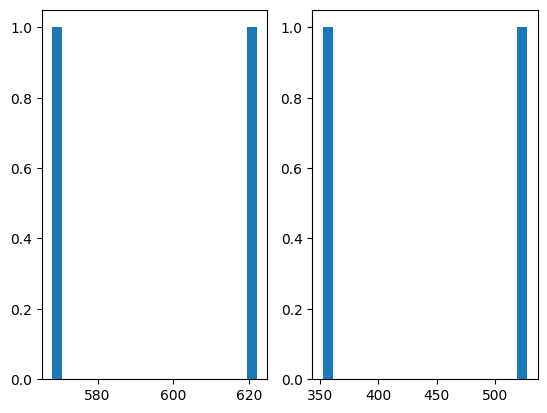

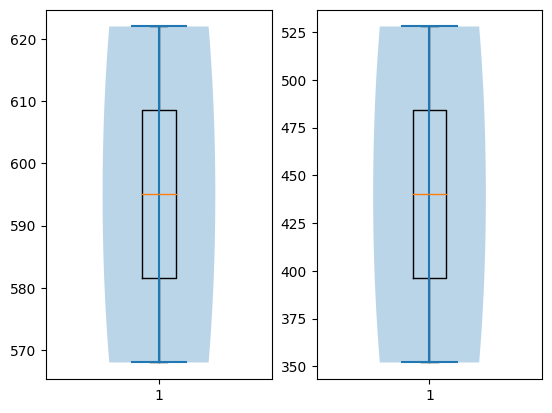

In [ ]:
# Check the stats of the height and width
median_w =int(np.quantile(np.array(image_sizes)[:,0],0.5)/10)*10
median_h =int(np.quantile(np.array(image_sizes)[:,1],0.5)/10)*10
print("H median",median_w)
print("W median",median_h)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(np.array(image_sizes)[:,0],bins=20);
ax2.hist(np.array(image_sizes)[:,1],bins=20);
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(np.array(image_sizes)[:,0]);
ax1.violinplot(np.array(image_sizes)[:,0]);

ax2.boxplot(np.array(image_sizes)[:,1]);
ax2.violinplot(np.array(image_sizes)[:,1]);
plt.show()

In [ ]:
# A function that takes an image/mask and save the resized version of it
def resize_images(file_names,target_w,target_h,save_path):
    for i,f in enumerate(file_names):
        img = Image.open(f)
        img2 = img.resize((target_w,target_h), Image.ANTIALIAS)
        im_file_name=os.path.basename(f)
        img2.save(save_path+im_file_name)
    print(i+1,"files resized")

In [ ]:
#decided to set the Hand W to 256
target_h=256
target_w=256
resized_folder="/content/drive/MyDrive/resized/"
resize_images(img_files,target_w,target_h,save_path=resized_folder+"images/")
resize_images(msk_files,target_w,target_h,resized_folder+"masks/")

1000 files resized
1000 files resized


In [ ]:
!git clone https://github.com/Awadelrahman/MedAI.git

Cloning into 'MedAI'...
remote: Enumerating objects: 131, done.
remote: Total 131 (delta 0), reused 0 (delta 0), pack-reused 131
Receiving objects: 100% (131/131), 2.47 MiB | 37.12 MiB/s, done.
Resolving deltas: 100% (35/35), done.


In [ ]:
cd /content/MedAI

/content/MedAI


In [ ]:
resized_folder="/content/drive/MyDrive/resized/"


In [ ]:
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import image
from numpy import savez_compressed
from torchvision import transforms
import copy
import random


import torch
from gan import Generator, Discriminator  # models are in gan.py file
from torch.utils.data import DataLoader, Dataset
from torch.autograd import Variable
from PIL import Image
import torch.nn.functional as F
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
def match_im_msk(img_files,msk_files):
    
    pure_img_names=[]
    pure_msk_names=[]

    for im in img_files:
        pure_img_names+= [os.path.basename(im)]
    for msk in msk_files:
        pure_msk_names+= [os.path.basename(msk)]
    
    return(pure_img_names,pure_msk_names)

In [ ]:
# loading data from the resized set
data_dir = "/content/drive/MyDrive/resized/"
img_files = glob.glob(data_dir+"images/*.jpg")
msk_files=glob.glob(data_dir+"masks/*.jpg")
pure_img_names,pure_msk_names=match_im_msk(img_files,msk_files)
pure_img_names==pure_msk_names

False

In [ ]:
#normalizing the image data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std =[0.5, 0.5, 0.5],
    ),
])

In [ ]:
loaded_images = list()
loaded_masks = list()

for i,filename in enumerate(img_files):
    # load image
    img_data = image.imread(filename)
    # store loaded image
    img_data_tr=transform(img_data.copy()).numpy()
    loaded_images.append(img_data_tr)
    if i%500 ==0:
        print('> loaded image %s %s' % (filename, img_data_tr.shape))
for i,filename in enumerate(msk_files):
    # load image
    msk_data = image.imread(filename)
    msk_data_tr=transform(msk_data.copy()).numpy()
    # store loaded image
    loaded_masks.append(msk_data_tr)
    if i%500 ==0:
        print('> loaded mask %s %s' % (filename, msk_data_tr.shape))

> loaded image /content/drive/MyDrive/resized/images/cju5jx7jzf7c90871c2i9aiov.jpg (3, 256, 256)
> loaded image /content/drive/MyDrive/resized/images/cju3ua8u0g9rg0801uayhdxhu.jpg (3, 256, 256)
> loaded mask /content/drive/MyDrive/resized/masks/cjyzurzvohqnr0794es1itzek.jpg (3, 256, 256)
> loaded mask /content/drive/MyDrive/resized/masks/cju357rxxdaz30878y2esjpjt.jpg (3, 256, 256)


In [ ]:
ngf= 64   # generator number of filters
ndf= 64   # discriminator number of filters
lrG=0.002 #0.0002
lrD=0.002
lamb=100  # loss weighting parameters
beta1=0.5 
beta2=0.999

In [ ]:
print("number of samples",len(loaded_images))
print("image dim", loaded_images[0].shape)
print("mask  dim",loaded_masks[0].shape)

number of samples 1000
image dim (3, 256, 256)
mask  dim (3, 256, 256)


In [ ]:
G = Generator(3, ngf, 3)
D = Discriminator(6, ndf, 1)
G.normal_weight_init(mean=0.0, std=0.02)
D.normal_weight_init(mean=0.0, std=0.02)

print(D)

Discriminator(
  (conv1): ConvBlock(
    (conv): Conv2d(6, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (lrelu): LeakyReLU(negative_slope=0.2, inplace=True)
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): ConvBlock(
    (conv): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (lrelu): LeakyReLU(negative_slope=0.2, inplace=True)
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): ConvBlock(
    (conv): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (lrelu): LeakyReLU(negative_slope=0.2, inplace=True)
    (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv4): ConvBlock(
    (conv): Conv2d(256, 512, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
    (lrelu): LeakyReLU(negative_slope=0.2, inplace=True)
    (bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, trac

In [ ]:
print(G)


Generator(
  (conv1): ConvBlock(
    (conv): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (lrelu): LeakyReLU(negative_slope=0.2, inplace=True)
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): ConvBlock(
    (conv): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (lrelu): LeakyReLU(negative_slope=0.2, inplace=True)
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): ConvBlock(
    (conv): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (lrelu): LeakyReLU(negative_slope=0.2, inplace=True)
    (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv4): ConvBlock(
    (conv): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (lrelu): LeakyReLU(negative_slope=0.2, inplace=True)
    (bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_ru

In [ ]:
# to track the training epochs and runs

if not os.path.exists('id_log.txt'):
    with open('id_log.txt','w') as f:
        f.write('0')
with open('id_log.txt','r') as f:
    run_id = int(f.read())
    run_id+=1 

with open('id_log.txt','w') as f:
    f.write(str(run_id))

model_dir = 'GAN_model/'
save_dir='GAN_results/'
ex_dir=save_dir+str(run_id)+"/"


if not os.path.exists(save_dir):
    os.mkdir(save_dir)
    
if not os.path.exists(ex_dir):
    os.makedirs(ex_dir)
    
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

In [ ]:
# Loss functions
BCE_loss = torch.nn.BCELoss()#.cuda()
L1_loss = torch.nn.L1Loss()#.cuda()

# I used my laptop, cuda is an option
#G.cuda()
#D.cuda()

In [ ]:
import torch

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
torch.cuda.is_available()

True

In [ ]:
# this is the last training trial, I used the whole dataset, but I sued 900:100 training:validation for parameters tuning


split_point=len(loaded_images)
X_train=np.array(loaded_images[:split_point])
Y_train=np.array(loaded_masks[:split_point])
im_train_names=np.array(pure_img_names[:split_point])
msk_train_names=np.array(pure_msk_names[:split_point])

# X_val=np.array(loaded_images[split_point:])
# Y_val=np.array(loaded_masks[split_point:])
# im_val_names=np.array(pure_img_names[split_point:])
# msk_val_names=np.array(pure_msk_names[split_point:])

print("train set:", len(Y_train),len(X_train))
# print("val   set:", len(Y_val),len(X_val))

train set: 1000 1000


In [ ]:
# create a dataset class for the loader 
class Seg(Dataset):
    def __init__(self,X,Y,im_names,mask_names):

        self.len=X.shape[0]
        self.xdata=torch.from_numpy(X)
        self.ydata=torch.from_numpy(Y)
        
        self.xnames=im_names
        self.ynames=mask_names
        
    def __getitem__(self,index):
        return (self.xdata[index],self.ydata[index],self.xnames[index],self.ynames[index])
    
    def __len__(self):
        return(self.len)

In [ ]:
# A function to save sample during training
# I created the function to save features from the middle of the netork
# the purpouse was to use them in creating graph later, however I stick to the GANs in this phase

def save_epoch_pairs(imgs_batch,
                     masks_batch,
                     gen_masks_batch, 
                     im_fn_batch,
                     msk_fn_batch,
                     im_dir_name,
                     msk_dir_name,
                     gen_msk_dir_name,
                     feat_dir_name):
    
   
    for i in range(len(imgs_batch)):
        
        im_fn =im_fn_batch[i]
        msk_fn=msk_fn_batch[i]
        

        
        gen_mask=gen_masks_batch[i].detach().numpy()#.permute(1,2,0).detach().numpy().astype(np.uint8)

        save_genmsk_fn = gen_msk_dir_name + msk_fn
        gen_mask_ = (((gen_mask -gen_mask.min()) * 255) / (gen_mask.max() - gen_mask.min())).transpose(1, 2, 0).astype(np.uint8)
        msk_gen = Image.fromarray(gen_mask_)
        msk_gen.save(save_genmsk_fn)
        #plt.show()
        plt.close()
        
        #save_msk_fn = msk_dir_name + msk_fn
        #msk_real = Image.fromarray(target_msk)
       # msk_real.save(save_msk_fn)
        #plt.show()
        #plt.close()
        
        
        # Saving features....
#         save_feat_fn = feat_dir_name + msk_fn[:-3]+"npz"
#         feat = features_batch[i].detach().numpy()
#         savez_compressed(save_feat_fn, feat)
        #torch.save(feat, save_feat_fn)

In [ ]:
batch_size=8

train_seg=Seg(X_train,Y_train,im_train_names,msk_train_names)
train_loader=DataLoader(dataset=train_seg,batch_size=batch_size,shuffle=True)

# val_seg=Seg(X_val,Y_val,im_val_names,msk_val_names)
# val_loader=DataLoader(dataset=val_seg,batch_size=2,shuffle=True)

In [ ]:
# Optimizers
G_optimizer = torch.optim.Adam(G.parameters(), lr=lrG, betas=(beta1, beta2))
D_optimizer = torch.optim.Adam(D.parameters(), lr=lrD, betas=(beta1, beta2))

In [ ]:
# Training GAN
D_avg_losses = []
G_avg_losses = []
num_epochs=2
step = 0
for epoch in range(num_epochs):
    
    epoch_dir=ex_dir+str(epoch)+"/"
    if not os.path.exists(epoch_dir):
        os.mkdir(epoch_dir)


    epoch_im_dir=epoch_dir+"images/"


    epoch_msk_dir=epoch_dir+"masks/"


    epoch_genmsk_dir=epoch_dir+"gen_masks/"
    if not os.path.exists(epoch_genmsk_dir):
        os.mkdir(epoch_genmsk_dir)


    epoch_feat_dir=epoch_dir+"features/"
    if not os.path.exists(epoch_feat_dir):
        os.mkdir(epoch_feat_dir)

    D_losses = []
    G_losses = []

    # training
    for i, (input, target, im_file_names, msk_file_names) in enumerate(train_loader):

        # input & target image data
        x_ = Variable(input)#.permute(0,3,1,2)#Variable(input.cuda())
        y_ = Variable(target)#.permute(0,3,1,2)#Variable(target.cuda())

        x_ = x_.float()#Variable(input.cuda())
        y_ = y_.float()#Variable(target.cuda())

        # Train discriminator with real data
        D_real_decision = D(x_, y_).squeeze()
        real_ = Variable(torch.ones(D_real_decision.size())) #Variable(torch.ones(D_real_decision.size()).cuda())
        D_real_loss = BCE_loss(D_real_decision, real_)

        # Train discriminator with fake data
        gen_image, _ = G(x_)
        D_fake_decision = D(x_, gen_image).squeeze()
        fake_ = Variable(torch.zeros(D_fake_decision.size()))#Variable(torch.zeros(D_fake_decision.size()).cuda())
        D_fake_loss = BCE_loss(D_fake_decision, fake_)

        # Back propagation
        D_loss = (D_real_loss + D_fake_loss) * 0.5
        D.zero_grad()
        D_loss.backward()
        D_optimizer.step()

        # Train generator
#         gen_image, features = G(x_)
        gen_image, _ = G(x_)
        D_fake_decision = D(x_, gen_image).squeeze()
        G_fake_loss = BCE_loss(D_fake_decision, real_)

        # L1 loss
        l1_loss = lamb * L1_loss(gen_image, y_)

        # Back propagation
        G_loss = G_fake_loss + l1_loss
        G.zero_grad()
        G_loss.backward()
        G_optimizer.step()

        # loss values
        D_losses.append(D_loss.item())
        G_losses.append(G_loss.item())
        
        #features_proj=F.interpolate(features,scale_factor=(2,2), mode='nearest')

        print('Epoch [%d/%d], Step [%d/%d], D_loss: %.4f, G_loss: %.4f'
              % (epoch+1, num_epochs, i+1, len(train_loader), D_loss.item(), G_loss.item()))
        

#         if epoch>=0:
#             save_epoch_pairs(x_,
#                              y_,
#                              gen_image,
#                              features_proj,
#                              im_file_names,
#                              msk_file_names,
#                              epoch_im_dir,
#                              epoch_msk_dir,
#                              epoch_genmsk_dir,
#                              epoch_feat_dir)

        
        if epoch>=4:
            save_epoch_pairs(x_,
                             y_,
                             gen_image,
                             im_file_names,
                             msk_file_names,
                             epoch_im_dir,
                             epoch_msk_dir,
                             epoch_genmsk_dir,
                             epoch_feat_dir)

        
#         save_epoch_pairs(imgs_batch,
#                      masks_batch,
#                      gen_masks_batch, 
#                      im_fn_batch,
#                      msk_fn_batch,
#                      im_dir_name,
#                      msk_dir_name,
#                      gen_msk_dir_name):

    D_avg_loss = torch.mean(torch.FloatTensor(D_losses))
    G_avg_loss = torch.mean(torch.FloatTensor(G_losses))

    # avg loss values for plot
    D_avg_losses.append(D_avg_loss)
    G_avg_losses.append(G_avg_loss)

    # Show result for test image
    
#     val_input, val_target, val_img_names, val_msk_names = val_loader.__iter__().__next__()

#     gen_image = G(Variable(test_input))
#     gen_image = gen_image.cpu().data
#     plot_test_result(test_input, test_target, gen_image, epoch, save=True, ex_dir=ex_dir)
    
    save_model_fn=ex_dir+"Seg_GAN.pth"
        
    torch.save({"g_state_dict":G.state_dict(),
                "d_state_dict":D.state_dict(),
                "g_opt_dict":G_optimizer.state_dict(),
                "d_opt_dict":G_optimizer.state_dict(),
                       },
                       save_model_fn
                      )

Epoch [1/2], Step [1/125], D_loss: 0.8160, G_loss: 101.1399
Epoch [1/2], Step [2/125], D_loss: 3.6933, G_loss: 90.3492
Epoch [1/2], Step [3/125], D_loss: 12.1601, G_loss: 72.0481
Epoch [1/2], Step [4/125], D_loss: 5.4454, G_loss: 49.0525
Epoch [1/2], Step [5/125], D_loss: 1.7447, G_loss: 39.3654
Epoch [1/2], Step [6/125], D_loss: 1.3662, G_loss: 42.1852
Epoch [1/2], Step [7/125], D_loss: 1.4960, G_loss: 37.6543
Epoch [1/2], Step [8/125], D_loss: 0.6810, G_loss: 29.4379
Epoch [1/2], Step [9/125], D_loss: 1.0834, G_loss: 33.1533
Epoch [1/2], Step [10/125], D_loss: 0.7547, G_loss: 27.2149
Epoch [1/2], Step [11/125], D_loss: 1.0422, G_loss: 32.0560
Epoch [1/2], Step [12/125], D_loss: 1.2372, G_loss: 23.7943
Epoch [1/2], Step [13/125], D_loss: 0.8567, G_loss: 32.3555
Epoch [1/2], Step [14/125], D_loss: 0.7473, G_loss: 37.5638
Epoch [1/2], Step [15/125], D_loss: 1.0626, G_loss: 32.0744
Epoch [1/2], Step [16/125], D_loss: 0.5814, G_loss: 27.9749
Epoch [1/2], Step [17/125], D_loss: 0.7383, G_l

# Testing

In [ ]:
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import image
from numpy import savez_compressed
from torchvision import transforms
import copy

In [ ]:
import torch
from gan import Generator, Discriminator
from torch.utils.data import DataLoader, Dataset
from torch.autograd import Variable
from PIL import Image
import torch.nn.functional as F
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import random

In [ ]:
ngf= 64
ndf= 64
lrG=0.002 #0.0002
lrD=0.002
lamb=100
beta1=0.5
beta2=0.999
G = Generator(3, ngf, 3)
D = Discriminator(6, ndf, 1)
G.normal_weight_init(mean=0.0, std=0.02)
D.normal_weight_init(mean=0.0, std=0.02)

print(D)

print(G)

Discriminator(
  (conv1): ConvBlock(
    (conv): Conv2d(6, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (lrelu): LeakyReLU(negative_slope=0.2, inplace=True)
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): ConvBlock(
    (conv): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (lrelu): LeakyReLU(negative_slope=0.2, inplace=True)
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): ConvBlock(
    (conv): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (lrelu): LeakyReLU(negative_slope=0.2, inplace=True)
    (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv4): ConvBlock(
    (conv): Conv2d(256, 512, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
    (lrelu): LeakyReLU(negative_slope=0.2, inplace=True)
    (bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, trac

In [ ]:
def save_mask_batch(gen_masks_batch, 
                     msk_fn_batch,
                     gen_msk_dir_name,
                    original_size):
    
   
    for i in range(len(gen_masks_batch)):
        
        msk_fn=msk_fn_batch
        
        gen_mask=gen_masks_batch[i].detach().numpy()#.permute(1,2,0).detach().numpy().astype(np.uint8)

       
        save_genmsk_fn = gen_msk_dir_name + msk_fn
#         print(save_genmsk_fn)
        gen_mask_ = (((gen_mask -gen_mask.min()) * 255) / (gen_mask.max() - gen_mask.min())).transpose(1, 2, 0).astype(np.uint8)
        msk_gen = Image.fromarray(gen_mask_)
        msk_gen_original_size= msk_gen.resize((original_size[0],original_size[1]), Image.ANTIALIAS)
        msk_gen_original_size.save(save_genmsk_fn)
        #plt.show()
        plt.close()



transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std =[0.5, 0.5, 0.5],
    ),
])        

In [ ]:
# loading test data

test_data_dir = "/content/drive/MyDrive/data_tar/Kvasir/"
test_results_dir = "/content/drive/MyDrive/data_tar/Kvasir/masks/"

test_img_files = glob.glob(test_data_dir+"images/*.jpg")
#msk_files=glob.glob(data_dir+"masks/*.jpg")

In [ ]:
#loading trained model, we only need the generator

PATH="/content/MedAI/GAN_results/1/Seg_GAN.pth"
model_ckp = torch.load(PATH)
G.load_state_dict(model_ckp['g_state_dict'],strict=True)
#D.load_state_dict(checkpoint['d_state_dict'],strict=True)

<All keys matched successfully>

In [ ]:
# generate  masks

target_w=256
target_h=256

for  i,f in enumerate(test_img_files):
    img = Image.open(f)
# 1. resize images to the inputs size
    image_size=list(img.size) # we need to keep the original image size
    img_resized = img.resize((target_w,target_h), Image.ANTIALIAS)
    img_tr=transform(img_resized.copy()).numpy()
    test_image= torch.tensor(img_tr)
    test_image = torch.unsqueeze(test_image, 0)
# 2. generate  512 * 512 mask
    
    gen_msak_sample,_= G(test_image)
    
    
    im_file_name=os.path.basename(f)
# save the generated mask, we also pass the original size to get the original shape    
    save_mask_batch(gen_msak_sample,im_file_name,test_results_dir,image_size)

In [ ]:
def transform_back(im):
    im_ = (((im -im.min()) * 255) / (im.max() - im.min())).transpose(1, 2, 0).astype(np.uint8)
    return(im_)

def new_layer(layer, g):
    #copy a layer and pass its parameters through the function g."
    layer = copy.deepcopy(layer)
    try: layer.weight = torch.nn.Parameter(g(layer.weight))
    except AttributeError: pass
    
    try: layer.bias = torch.nn.Parameter(g(layer.bias))
    except AttributeError: pass
    return layer

In [ ]:
target_w=256
target_h=256


for  i,f in enumerate(test_img_files):
    img = Image.open(f)
    image_size=list(img.size)
    img_resized = img.resize((target_w,target_h), Image.ANTIALIAS)
    img_tr=transform(img_resized.copy()).numpy()
    test_image= torch.tensor(img_tr)
    test_image = torch.unsqueeze(test_image, 0)
    
    gen_msak_sample,_= G(test_image)
    
    
    im_file_name=os.path.basename(f)
    

    layers=list(G._modules) # get generator trained layers (parameters)

    
    n_layers = len(layers)
    
# set a place holder for the activations to calculates next
    activations = [test_image] + [None] * n_layers # list of activations


    # for each layer  in the conv part of the generator
    for layer in range(9):
        
        #get the activations
        activation = G._modules[layers[layer]].forward(activations[layer])
        
        #pass it for the next layer
        activations[layer+1] = activation
    
    # for each layer  in the deconv part of the generator
    for layer in range(9,len(layers)):
        
        #convatenate the corresponding conv layer based on the skip connections
        cat_in=torch.cat([activations[layer], activations[16-layer]], 1) 
        activation = G._modules[layers[layer]].forward(cat_in)
        activations[layer+1] = activation

            
    # calculate the output as we use tanh in the model
    output_activation = torch.nn.Tanh()(activations[-1]).detach().cpu().numpy()#[0,:,:,:]

    # convert the RGB mask output to grey scale
    outpu_activation=np.asarray(Image.fromarray(output_activation[0,:,:,:].transpose(1,2,0).astype('uint8'),
                                               'RGB').convert('L'))
    
    # set predicted mask pixels to 1
    output_activation[output_activation>=0]= 1
    # set predicted normal pixels to 0
    output_activation[output_activation!=1]= 0
    
    # save the output activation to the last element of the activations placeholder
    activations[-1]=torch.FloatTensor(output_activation) 

    # Backpropagate relevvance scores
    relevances = [None] * n_layers + [activations[-1]]
    
    # go over the layers in reverse order
    
    # define the rho function based on the model of haveing <17 layers (refer to the above paper)
    rho = lambda p: p + 0.25*p.clamp(min=0); incr = lambda z: z+1e-9

    for layer in range(0, n_layers)[::-1]:
        # inreverse order we start by the deconv section
        if layer>=9:

            activations[layer] = activations[layer].data.requires_grad_(True)

            cat_in2=torch.cat([activations[layer], activations[16-layer]], 1)
            z = incr(new_layer(G._modules[layers[layer]],rho).forward(cat_in2))
            
            # devide relevance / z element wise
            s = (relevances[layer+1]/z).data    
            
            # Calculate the gradient and multiply it by the activation,
            # we should retain the graph as we will pass through it multiple times
            (z * s).sum().backward(retain_graph=True); 
            c = activations[layer].grad       
            relevances[layer] = (activations[layer]*c).data
        # we do the same for the conv section
        else:
            activations[layer] = activations[layer].data.requires_grad_(True)

            
            cat_in2=torch.cat([activations[layer], activations[layer]], 1)
            z = incr(new_layer(G._modules[layers[layer]],rho).forward(cat_in2[:,:int(cat_in2.shape[1]/2),:,:]))

            s = (relevances[layer+1]/z).data                                     
            (z * s).sum().backward(retain_graph=True); 
            c = activations[layer].grad       
            relevances[layer] = (activations[layer]*c).data                          

    
    
    # plotting and saving relevance scores
    img_to_plot=transform_back(test_image[0,:].detach().numpy())
    gen_msak_sample_to_plot=transform_back(gen_msak_sample[0,:].detach().numpy())
    fig, axs= plt.subplots(1,3,figsize=(30,20))

    axs[0].imshow(img_to_plot)
    axs[0].axis('off')
    axs[0].set_title("Image", size=24)

    image_rlp=relevances[0][0,:,:,:].permute(1,2,0).detach().numpy()
    image_rlp = np.interp(image_rlp, (image_rlp.min(),
                                                    image_rlp.max()), 
                                                    (0, 1))
    axs[1].imshow(image_rlp[:,:,0], cmap="seismic")

    axs[1].axis('off')

    axs[1].set_title("Input Pixels Relevance ", size=24)

    axs[2].imshow(gen_msak_sample_to_plot)
    axs[2].axis('off')
    axs[2].set_title("Predicted mask", size=24)
    
    
    plt.show()

    
    
    fig.savefig('/content/MedAI/SavedFigures/'+im_file_name, dpi=200)

    
    selected_layers=[0,4,6,12,13,15]

    fig, axs= plt.subplots(1,len(selected_layers)+1,figsize=(30,20))

    axs[0].imshow(img_to_plot)
    axs[0].axis('off')
    axs[0].set_title("Image", size=24)
    for l,layer in enumerate(selected_layers):

        image_rlp=relevances[layer][0,:,:,:].permute(1,2,0).detach().numpy()
        image_rlp = np.interp(image_rlp, (image_rlp.min(),
                                                        image_rlp.max()), 
                                                        (0, 1))
        axs[l+1].imshow(image_rlp[:,:,0], cmap="seismic")


        axs[l+1].axis('off')


        axs[l+1].set_title("layer "+str(layer), size=24)

    axs[l+1].imshow(gen_msak_sample_to_plot)
    axs[l+1].axis('off')
    axs[l+1].set_title("predicted mask", size=24)


    plt.show()
    
    fig.savefig('/content/MedAI/SavedFigures/'+im_file_name, dpi=200)